# Image Compression by K-means clustering

In this exercise, you have to perform an image compression of the given picture of New York (New York.jpeg).

To do so, we want to keep not all the possible colors, but only 4.

Thus, you have to perform a clustering algorithm, with K=4, and show the image with those only 4 colors.

```
🔦 Hint:: An image is composed of pixels. Each pixel is made of 3 channels: Red, Green, Blue (RGB). Those color levels are encoded on 8 bits, meaning they are in the range [0-255]. For example, a pixel with this RGB color : (0, 0, 255) will be a very strong blue pixel.

```

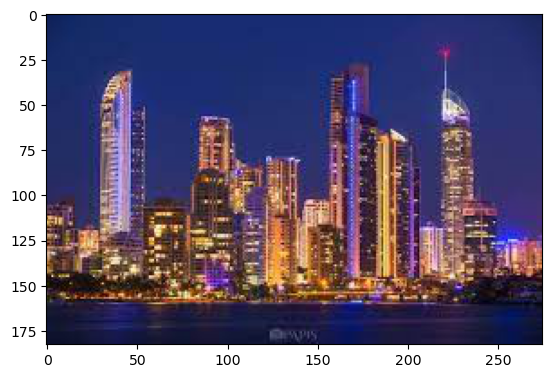

In [8]:
%matplotlib inline
# TODO: Load and review the image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image = np.asarray(Image.open('goldcoast.jpeg'))
plt.imshow(image)
plt.show()

In [11]:
# TODO: Reshape the image for k-means clustering
image_reshape = image.reshape(50325, 3)
print("image: {}".format(image.shape))
print("image reshape: {}".format(image_reshape.shape))

image: (183, 275, 3)
image reshape: (50325, 3)


In [29]:
# TODO: Run k-means clustering on reshaped image
from sklearn.cluster import KMeans
modele_km= KMeans(n_clusters=4)
modele_km.fit(image_reshape)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [18]:
# TODO: Run k-means clustering on reshaped image
from sklearn.cluster import KMeans
modele_km= KMeans(algorithm='auto', n_clusters=4, copy_x=True, init='k-means++',
                  max_iter=300, n_init=10,
                  random_state=0, tol=0.0001, verbose=0)
modele_km.fit(image_reshape)

/Users/dinhthingocha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=4, n_init=10, random_state=0)

In [23]:
# TODO: Print cluster centers and construct compressed image
palette = modele_km.cluster_centers_
labels = modele_km.predict(image_reshape)
compressed_image = np.zeros_like(image_reshape)
for i in range (len(palette)):
    compressed_image[labels == i] = palette[i]

print(palette)
print("compressed image: {}".format(compressed_image.shape))

[[ 46.92143105  30.51671864  47.95893971]
 [199.31440301 155.43551146 147.04327745]
 [127.58700236  84.40009922  79.61825623]
 [ 38.28791412  46.94403345 112.8056449 ]]
compressed image: (50325, 3)


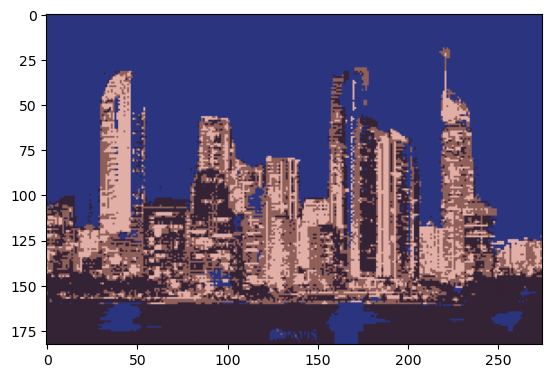

In [29]:
# TODO: Show the compressed image
compressed_image = compressed_image.reshape(183, 275, 3)
plt.imshow(compressed_image/225.)
plt.show()